# Introdução

Os participantes do grupo são:
- Felipe Kleine - 5992514
- Gabriel Brandão - 10737182
- Guilherme Simões - 10758748
- Isaac Bergerman - 10337575
- Jiang Zhi - 9778706
- Ricardo Felix - 13797118

O link do Google Drive é https://drive.google.com/drive/folders/10eByLk4JH07dS5MFJV7H4jAr338w6pIV?usp=sharing, o link do Git é 
https://github.com/FelipeKleine/EP-MAC0417_5768-2022.


Na parte 1 do EP, vamos fazer a coleta de imagem das classes de objetos e plotar essas informações na forma MNIST.


# Descrição de Dados

<!-- Essa seção deve conter uma Tabela Sumária dos Dados e uma Tabela Detalhada por Classe.

A tabela sumária de dados é uma tabela com as quebras por classe. 
A primeira tabela (Tabela Sumária dos Dados) deve conter um resumo geral dos dados, como o tamanho da base (em bytes), o número de imagens e a resolução das imagens (Tabela 1).

https://www.tablesgenerator.com/markdown_tables
-->

<style> 
table td, table th, table tr {text-align:left !important;}
</style>


Nessa parte, vamos fazer a descrição das informações com uma tabela sumária dos dados.

| Número de classes   | Tamanho da base  | Número de imagem  | Resolução das imagens  |
|---|---|---|---|
| 10 |  6.8GB|    468| 4032x1816, 4000x2250, 9248x6936, 3840x2160 |



E também a descrição das informações com uma tabela por classes.

| Número da classe   | Tipo da classe | Tamanho da base  | Número de objetos  |Número de imagens  | Resolução das imagens  | Plano de fundo|
|---|---|---|---|---|---|---|
| 1  |  Caneca  |  145MB |   3| 36| 4032x1816 | Branco, Vermelho e Verde |
| 2  | Controle |  617MB |  10|120| 4000x2250 | Branco, Vermelho e Verde |
| 3  |  Garfo   |  2.3GB |   3|36| 9248x6936 | Branco, Vermelho e Verde |
| 4  |  Garrafa |  171MB |   3|36| 4032x1816 | Branco, Vermelho e Verde |
| 5  |  Headset |  308MB |   5|60| 4032x1816, 4000x2250| Branco, Vermelho e Verde |
| 6  |  Lapis   | 44.6MB |   3|36| 4032x1816, 3840x2160| Branco, Vermelho e Verde |
| 7  |  Livro   |  1.6GB |   3|36| 9248x6936, 3840x2160| Branco, Vermelho e Verde |
| 8  |  Oculos  |  146MB |   3|36| 4032x1816 | Branco, Vermelho e Verde |
| 9  |  Perfume |  143MB |   3|36| 4032x1816 | Branco, Vermelho e Verde |
| 10 |  Sapato  |  1.4GB |   3|36| 4000x2250 | Branco, Vermelho e Verde |

# Apresentação de Dados

As imagens foram plotadas em um formato MNIST-like abaixo.
Os metadados foram guardados diretamente no nome do arquivo, nesse formato {classe}\_{objeto}\_{iluminacao}\_{lugar}\_{fundo}\_{index}.{extension}, onde  {classe} é a classe de objeto, {iluminacao} é a iluminação de dia ou de noite, {lugar} é local, ou seja fora ou dentro de casa, {fundo} é a cor do plano de fundo, {index} é a repetição do objeto e {extension} é a extensão do arquivo.


Um exemplo é o seguinte: sapato\_01\_dia\_outdoor\_vermelho\_02.jpg


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


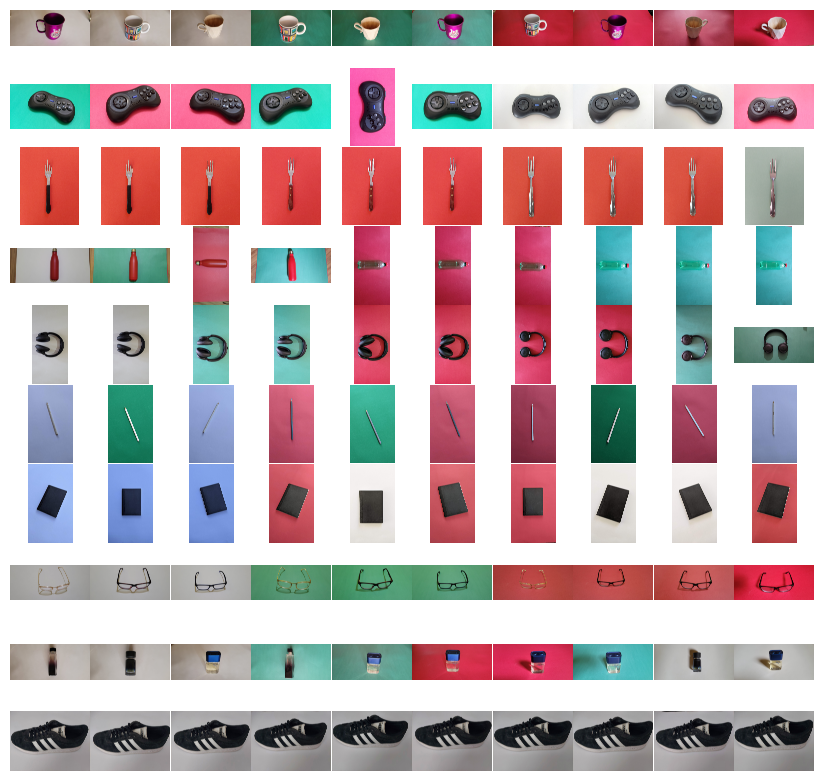

In [ ]:
## Referências 
#### Mostrando dataset MNIST - https://stackoverflow.com/questions/38308378/tensorflow-show-image-from-mnist-dataset
#### Plotando uma figura corretamente - https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly
#### Uma forma bonita de plotar a imagem - https://thedatafrog.com/en/articles/visualizing-datasets/
#### Trocar o espaçamento entre as figuras - https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

import matplotlib.pyplot as plt
import tensorflow as tf


## Para usar arquivos do Google Drive 
from google.colab import drive, files
import os
import cv2

from skimage.transform import resize

"""
  Essa função plota as imagens no formato MNIST que foi descrito no enunciado.
"""
def plot_mnistlike(image, height, width):
  ## Essa parte são constantes que são usadas para definir o espaço entre as imagens
  left  = 0.01  # o lado esquerdo do subplot da figura
  right = 1.35   # o lado direito do subplot da figura
  bottom = 0.01   # o lado inferior do subplot da figura
  top = 1.99    # o lado superior do subplot da figura
  wspace = 0.01   # a quantidade de largura reservado para o espaço em branco entre subplots
  hspace = 0.01  # a quantidade de altura reservado para o espaço em branco entre subplots

  ## Essa parte começa a plotar as imagens
  cnt = 0
  fig = plt.figure(dpi=100)
  for i in range(height):
      for j in range(width):
          fig.add_subplot(height, width, cnt+1)                          # Cria um novo subplot na figura
          plt.imshow(image[cnt])                                         # Mostra imagem
          plt.subplots_adjust(left, bottom, right, top, wspace, hspace)  # Faz ajustes de imagens
          plt.axis('off')                                                # Desativa os eixos
          cnt += 1

def show_mnist(height=10, width=10):
  mnist = tf.keras.datasets.mnist                                        # Puxa o dataset de Keras
  (x_train, y_train), (x_test, y_test) = mnist.load_data()               # Faz o load e faz a separação do dataset de treinamento e de teste
  plot_mnistlike(x_train, height, width)                                 # Plota o MNIST like

def import_image(height=10, width=10):
  classes = ["Caneca", "Controle", "Garfo", "Garrafa", "Headset",        # Nome das pastas de cada classe
             "Lapis", "Livro", "Oculos", "Perfume", "Sapato"]

  drive.mount('/content/drive')                                          # Usado para montar o Google Drive como diretorio
  os.chdir('/content/drive/MyDrive/EP-MAC0417-MAC5768-2022/')            # Mudando de pasta



  images = []
  for object_class in classes:                                           # Iterar sobre as classes
    directory = f"dataset/original/{object_class}"                       # Acha o nome do diretorio da classe
    size = 0                                                             # O size é usado para verificar o tamanho da linha em cada classe
    if not os.path.exists(directory):                                    # Verifica se o caminho existe
      continue
    for filename in os.listdir(directory):                               # Itera nos arquivos dentro do diretório
      full_path = os.path.join(directory, filename)                      # Encontra o caminho completo do arquivo
      if size >= width:                                                  # Verifica se já achou width objetos
        break
      ## Essa função verifica se é um arquivo                            
      if os.path.isfile(full_path) and size < width:                     # Verifica se é um arquivo e também se já achou width objetos
        image = cv2.imread(full_path)                                    # Lê o arquivo, é mais rápido que io.imread
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)                   # OpenCV tem o formato de BGR precisa fazer a conversão para RGB
        images.append(image)                                             # Adiciona na lista de imagens a serem plotadas no MNISTlike
        size += 1                                                        # Encontramos mais uma imagem para plotar no MNISTlike
  return images

def show_dataset(height=10, width=10):
  ## Importa as imagens do google drive
  images = import_image(height, width)                                   # Importa a imagem do google drive  
  plot_mnistlike(images, height, width)                                  # Plota o MNIST like





if __name__ == "__main__":

  height = 10                                                           # Define a altura, como tem 10 classes, então a altura é obrigatóriamente 10.
  width = 10                                                            # Define a largura como 10, então mostra 10 objetos dessa classe.
  #show_mnist(height, width)
  show_dataset(height, width)






# Conclusão

A aquisição de imagens é um processo manual complicado e demorado, que precisa de algum preparo antes da coleta das fotos. Nessa parte da tarefa, criamos um display MNISTlike para visualizar uma amostragem do dataset.